# P SAI PRIDHVI

# State Patrol Delta (SPD)

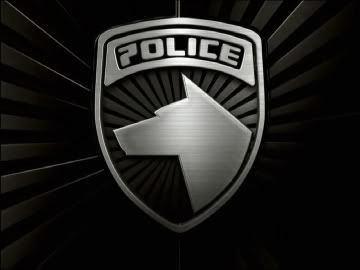

# <u>Objective <u/>

State Patrol Delta is start up which is trying to understand different types of crimes for few cities of USA and derive data insights for our start up to help police.

We are trying to find on which type of crime should be focused more on, which city and state has more crimes and also understand the pattern of crimes over a period of time.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/report.csv")

# Data Exploration

In [3]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [4]:
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


<u> Observations: </u>
1. report_year : 1975-2015
2. months_reported: min - 0, max-12

In [5]:
df.shape

(2829, 15)

<u> Observations: </u>

Our dataset contains 2829 rows and 15 columns.

In [6]:
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

<u> Observations: </u>

All column names are clean and ready to use.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

<u> Observations: </u>

1. We have null values in  'agency_code',  'population',       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',       'months_reported', 'crimes_percapita', 'homicides_percapita',
'rapes_percapita', 'assaults_percapita', 'robberies_percapita' (13 columns)
2. No null values in  'report_year',  'agency_jurisdiction' (2 columns)

3. 'agency_code' , 'agency_jurisdiction' columns are character type. remaining columns are numeric.

# Data Cleaning

We have 'agency_jurisdiction' column with both city and state seperated by ",". so, we are going to split the data into city and state.

In [8]:
df[['city','state_code']] = df.agency_jurisdiction.str.split(",",expand=True)

In [9]:
df = df.drop('agency_jurisdiction',axis=1)

We have data of each city and total US as well, so we are going to remove the data of US.

In [10]:
df.drop(df[df['city'] == 'United States'].index, inplace = True)

### Replace null values with mean of all cities by a state

In [11]:
state_population_mean = df.groupby('state_code')['population'].transform('mean')
state_violent_crimes_mean = df.groupby('state_code')['violent_crimes'].transform('mean')
state_homicides_mean = df.groupby('state_code')['homicides'].transform('mean')
state_rapes_mean = df.groupby('state_code')['rapes'].transform('mean')
state_assaults_mean = df.groupby('state_code')['assaults'].transform('mean')
state_robberies_mean = df.groupby('state_code')['robberies'].transform('mean')


df['population'].fillna(state_population_mean, inplace=True)
df['violent_crimes'].fillna(state_violent_crimes_mean, inplace=True)
df['homicides'].fillna(state_homicides_mean, inplace=True)
df['rapes'].fillna(state_rapes_mean, inplace=True)
df['assaults'].fillna(state_assaults_mean, inplace=True)
df['robberies'].fillna(state_robberies_mean, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 2827
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2788 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   population           2788 non-null   float64
 3   violent_crimes       2788 non-null   float64
 4   homicides            2788 non-null   float64
 5   rapes                2788 non-null   float64
 6   assaults             2788 non-null   float64
 7   robberies            2788 non-null   float64
 8   months_reported      2692 non-null   float64
 9   crimes_percapita     2753 non-null   float64
 10  homicides_percapita  2754 non-null   float64
 11  rapes_percapita      2754 non-null   float64
 12  assaults_percapita   2753 non-null   float64
 13  robberies_percapita  2754 non-null   float64
 14  city                 2788 non-null   object 
 15  state_code           2788 non-null   o

All null values are removed.

# One Column section

We will create 2 new columns to understand crimes better.

In [13]:
df['total_crimes'] = df['violent_crimes'] + df['homicides'] + df['rapes'] + df['assaults'] + df['robberies']  #.iloc[:,3:32].sum(axis=1)

In [14]:
df['relative_crimes'] = df['total_crimes']/df['population']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f59b3aa71c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f59b3aa7700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f59b3aa6f20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f59b3aa7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f59b3aa7ee0>],
 'means': []}

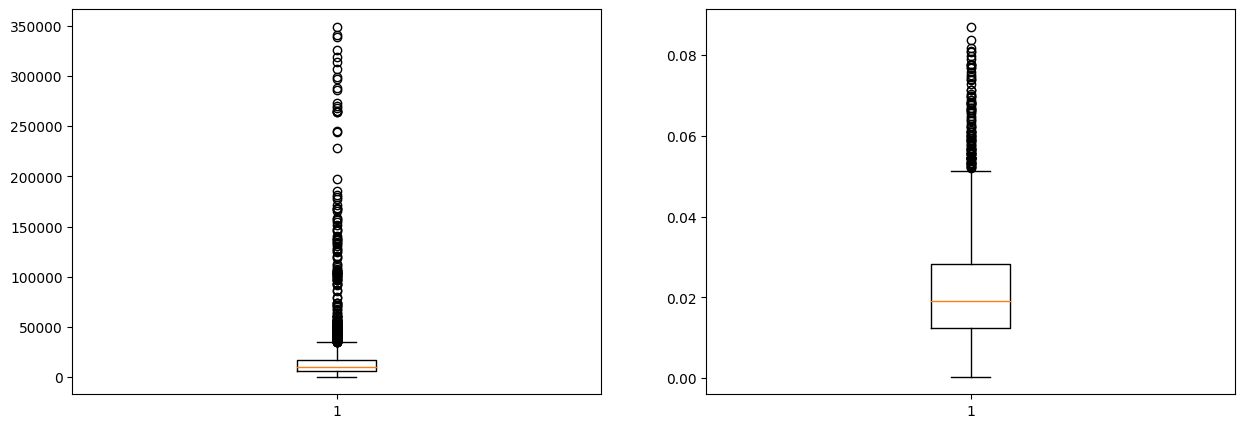

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.boxplot(df.total_crimes)

plt.subplot(1,2,2)
plt.boxplot(df.relative_crimes)

I have divide total crimes by population as crimes are directly proporational to population. if we divide total crimes by population, we can decrease outliers.

As you can see data from both boxplots, we can understand that though we tried to find relative crimes based on population we still have lot of outliers. As we require these outliers we are caluculating data based on total crimes.

# Sort

We will find the top 10 state which have higest crimes.

In [16]:
sort = df[['report_year','city','state_code','total_crimes','relative_crimes']]

In [17]:
city_crime = sort.groupby(['city','state_code']).agg(total_crimes=('total_crimes', lambda x: x.sum())).reset_index()
city_crime = city_crime.sort_values(by='total_crimes', ascending=False)
city_crime.head(n=10)

,city,state_code,total_crimes
41,New York City,NY,8526568.0
28,Los Angeles,CA,3958332.0
10,Chicago,IL,3921772.0
16,Detroit,MI,1836006.0
22,Houston,TX,1639078.0
47,Philadelphia,PA,1526402.0
5,Baltimore,MD,1201260.0
14,Dallas,TX,1180936.0
34,Miami-Dade County,FL,1000122.0
66,Washington,DC,867874.0


<u> Observation </u>

Newyork city has highest total crimes in 40 years followed by Los Angles and Chicago. there are 2 cities in Texas state which in top 10. Though data is collected based on major cities in states, Texas require more law and order.

# Series

In [18]:
violent_crime = df.groupby(['city','state_code']).agg(violent_crimes=('violent_crimes', lambda x: x.sum())).reset_index()
violent_crime = violent_crime.sort_values(by='violent_crimes', ascending=False)
violent_crime.head(n=3)

,city,state_code,violent_crimes
41,New York City,NY,4263284.0
28,Los Angeles,CA,1979166.0
10,Chicago,IL,1960886.0


Top 3 cities with highest violent crimes are New york city followed by Los Angeles and Chicago.

In [83]:
Percentage_violent_crimes = (df.violent_crimes.sum()/df.total_crimes.sum()) * 100
Percentage_homicides = (df.homicides.sum()/df.total_crimes.sum()) * 100
Percentage_rapes = (df.rapes.sum()/df.total_crimes.sum()) * 100
Percentage_assaults = (df.assaults.sum()/df.total_crimes.sum()) * 100
Percentage_robberies = (df.robberies.sum()/df.total_crimes.sum()) * 100
print("Percentage of Violent crimes:",Percentage_violent_crimes)
print("Percentage of Homicides:",Percentage_homicides)
print("Percentage of Rapes:",Percentage_rapes)
print("Percentage of Assaults:",Percentage_assaults)
print("Percentage of Robberies:",Percentage_robberies)

Percentage of Violent crimes: 49.99798881103942
Percentage of Homicides: 0.6982714198829125
Percentage of Rapes: 2.3290227623986826
Percentage of Assaults: 24.62398747914439
Percentage of Robberies: 22.3507295275346


Violent crimes explains around 50% of total crimes. so there is high chance to focus on this crime type.


In [68]:
homicides = df.groupby(['city','state_code']).agg(homicides=('homicides', lambda x: x.sum())).reset_index()
homicides = homicides.sort_values(by='homicides', ascending=False)
homicides.head(n=3)

,city,state_code,homicides
41,New York City,NY,47176.0
10,Chicago,IL,27727.0
28,Los Angeles,CA,25999.0


Top 3 cities with highest homicides are New york city followed by Chicago and Los Angeles.

In [80]:
rapes = df.groupby(['city','state_code']).agg(rapes=('rapes', lambda x: x.sum())).reset_index()
rapes = rapes.sort_values(by='rapes', ascending=False)
rapes.head(n=3)

,city,state_code,rapes
41,New York City,NY,101795.0
10,Chicago,IL,90209.0
28,Los Angeles,CA,69748.0


Top 3 cities with highest rapes are New york city followed by Chicago and Los Angeles.

In [81]:
assaults = df.groupby(['city','state_code']).agg(assaults=('assaults', lambda x: x.sum())).reset_index()
assaults = assaults.sort_values(by='assaults', ascending=False)
assaults.head(n=3)

,city,state_code,assaults
41,New York City,NY,1788065.0
28,Los Angeles,CA,1027731.0
10,Chicago,IL,951805.0


Top 3 cities with highest assaults are New york city followed by  Los Angeles and Chicago.

In [82]:
robberies = df.groupby(['city','state_code']).agg(robberies=('robberies', lambda x: x.sum())).reset_index()
robberies = robberies.sort_values(by='robberies', ascending=False)
robberies.head(n=3)

,city,state_code,robberies
41,New York City,NY,2326248.0
10,Chicago,IL,891145.0
28,Los Angeles,CA,855688.0


Top 3 cities with highest robberies are New york city followed by Chicago and Los Angeles.

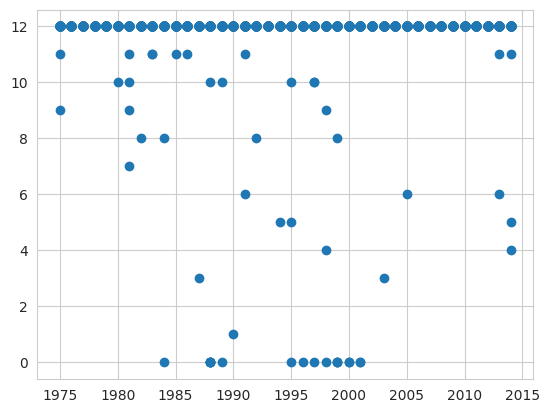

In [76]:
plt.scatter(df.report_year,df.months_reported)

from plot we can understand that from 1995-2000 most of the data was not reported.

# Plot

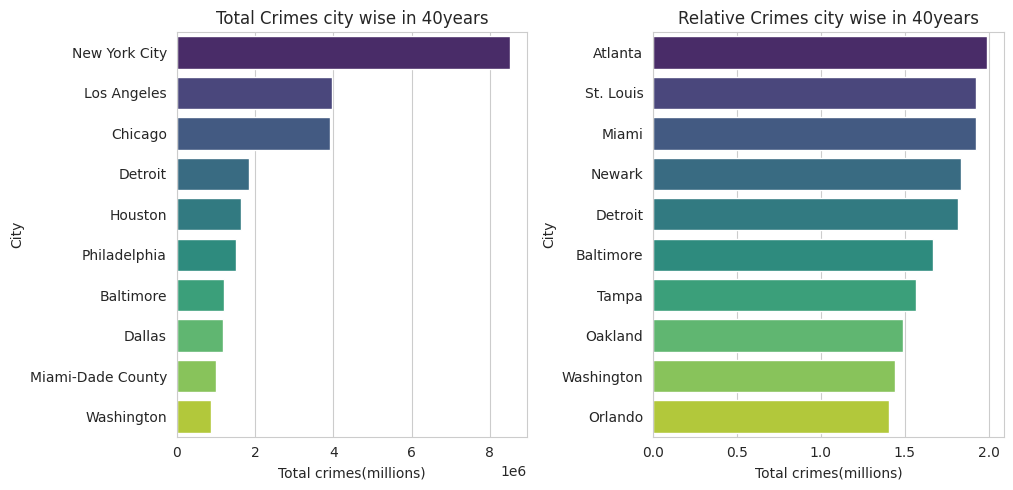

In [36]:
#Top cities with highest crimes based total and relative crimes
city_crime = df.groupby(['city','state_code']).agg(total_crimes=('total_crimes', lambda x: x.sum())).reset_index()
city_crime = city_crime.sort_values(by='total_crimes', ascending=False)
X = city_crime.iloc[:10]

relative_city_crime = df.groupby(['city','state_code']).agg(relative_crimes=('relative_crimes', lambda x: x.sum())).reset_index()
relative_city_crime = relative_city_crime.sort_values(by='relative_crimes', ascending=False)
Y = relative_city_crime.iloc[:10]

plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

plt.subplot(131)
sns.barplot(x='total_crimes', y='city', data=X, palette="viridis")
plt.title("Total Crimes city wise in 40years")
plt.ylabel("City")
plt.xlabel("Total crimes(millions)")

plt.subplot(132)
sns.set_style("whitegrid")
sns.barplot(x= 'relative_crimes', y='city', data=Y, palette="viridis")
plt.title("Relative Crimes city wise in 40years")
plt.ylabel("City")
plt.xlabel("Total crimes(millions)")

plt.tight_layout()
plt.show()

<u> Observations </u>

From left plot, we can understand that New York City has highest total crimes,followed by Los Angeles and Chicago.From the right plot, we can Atlanta has the highest relative total crimes followed by St.Louis and Miami. These cities need immediate attention for maintaing law and order.

In [54]:
X.state_code.value_counts()

 TX    2
 NY    1
 CA    1
 IL    1
 MI    1
 PA    1
 MD    1
 FL    1
 DC    1
Name: state_code, dtype: int64

<u>Observatios</u>

Texas has 2 cities in top 10 crime cities in 40 years.

Text(0, 0.5, ' Total crimes(Million)')

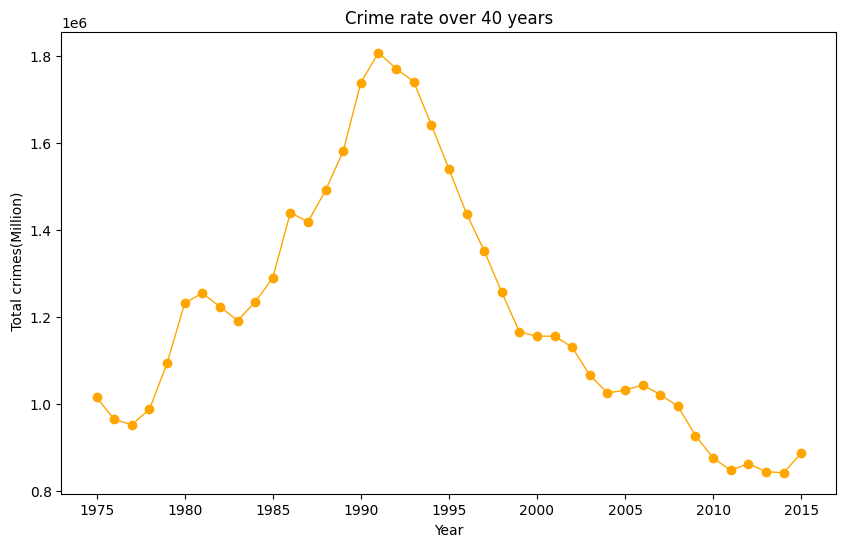

In [19]:
#plot total crimes vs year in 40 years
summary = df.groupby('report_year')['total_crimes'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(summary['report_year'], summary['total_crimes'], color="orange", linewidth=1, marker='o', markersize=6)
plt.title("Crime rate over 40 years")
plt.xlabel("Year")
plt.ylabel(" Total crimes(Million)")

In [20]:
summary.sort_values(by='total_crimes').tail(n=1)

,report_year,total_crimes
16,1991,1.808388e+06


<u> Observations: </u>

Crimes are increasing over a period 1975 to 1991 then started decreasing till 2015. so the crime decreased over a last 10-15 years. it was peak at 1991 and least 2015.

But it started increasing from 2014 to 2015. as it started increasing we should focus on cities which have high total crimes in last five years.

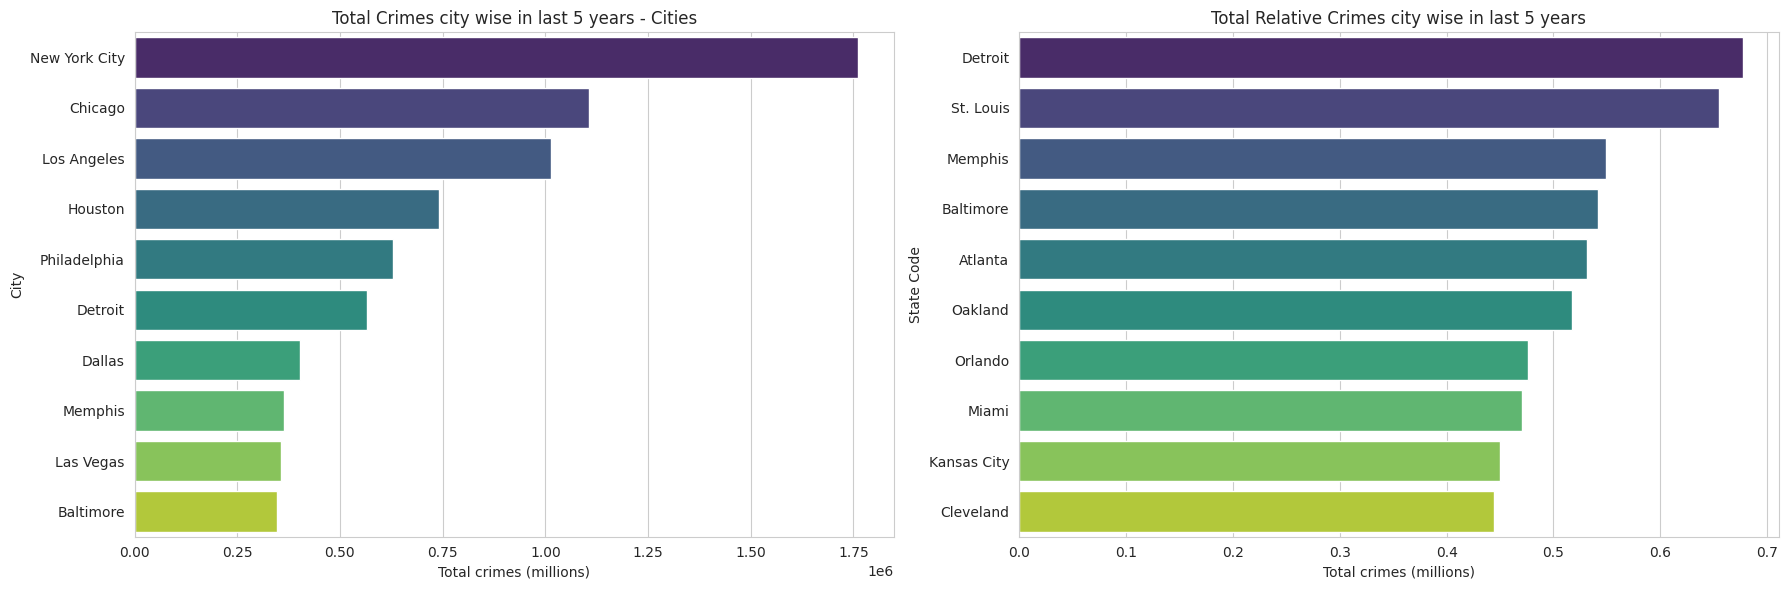

In [50]:
#Top cities with highest crimes based total and relative crimes in last 5 years
F = df[df['report_year'] >= 2000]
five_years_crime = F.groupby(['city','state_code']).agg(total_crimes=('total_crimes', lambda x: x.sum())).reset_index()
five_years_crime = five_years_crime.sort_values(by='total_crimes', ascending=False)
Z = five_years_crime.iloc[:10]

F = df[df['report_year'] >= 2000]
five_years_rel_crime = F.groupby(['city','state_code']).agg(relative_crimes=('relative_crimes', lambda x: x.sum())).reset_index()
five_years_rel_crime = five_years_rel_crime.sort_values(by='relative_crimes', ascending=False)
Q = five_years_rel_crime.iloc[:10]

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.set_style("whitegrid")

# Create the first subplot (bar plot for cities)
sns.barplot(x='total_crimes', y='city', data=Z, palette="viridis", ax=axs[0])
axs[0].set_title("Total Crimes city wise in last 5 years - Cities")
axs[0].set_xlabel("Total crimes (millions)")
axs[0].set_ylabel("City")

# Create the second subplot (bar plot for state codes)
sns.barplot(x='relative_crimes', y='city', data=Q, palette="viridis", ax=axs[1])
axs[1].set_title("Total Relative Crimes city wise in last 5 years")
axs[1].set_xlabel("Total crimes (millions)")
axs[1].set_ylabel("State Code")

plt.tight_layout()
plt.show()

<u>Observations </u>

from left plot, we can understand the same pattern repeats for 40years and last 5 years as well. Relative crimes changed for 40years and 5 years, Detroit has highest relative crimes followed by St.Louis and Memphis

In [51]:
Z.state_code.value_counts()

 TX    2
 NY    1
 IL    1
 CA    1
 PA    1
 MI    1
 TN    1
 NV    1
 MD    1
Name: state_code, dtype: int64

<u>Observations</u>

Texas has 2 cities in top 10 crime cities in last 5 years.

# Summary

We will study more on New York City

Text(0, 0.5, ' Total crimes(Million)')

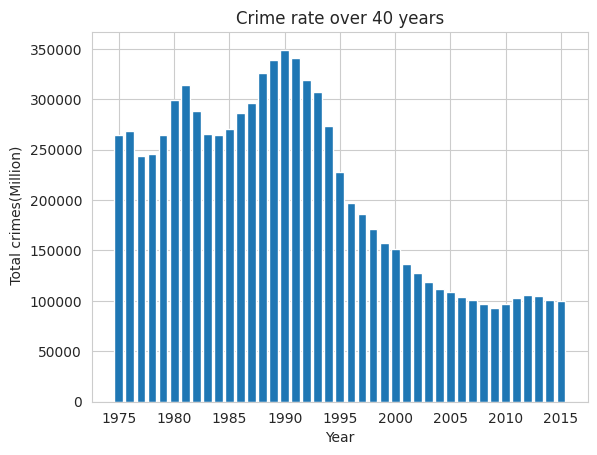

In [26]:
Newyork_city = df.loc[df['city'] == 'New York City']


plt.bar(Newyork_city['report_year'], Newyork_city['total_crimes'])
plt.title("Crime rate over 40 years")
plt.xlabel("Year")
plt.ylabel(" Total crimes(Million)")

from the plot, we can understand that though it increased from 1975 to 1991, it decreased till 2010 then had a slight increase and then decrease. from the last 5 years crimes are decreasing.

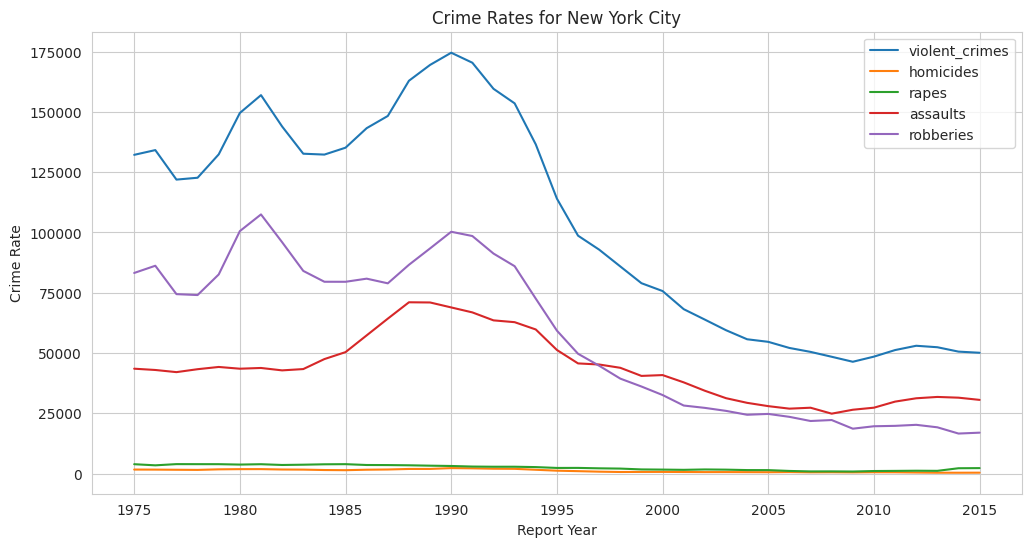

In [64]:
# Replace 'Your_City_Name' with the actual city name
city_name = 'New York City'

# Filter the data for the specific city
city_data = df[df['city'] == city_name]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each crime rate as a line graph
for crime_rate in ['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies']:
    sns.lineplot(x='report_year', y=crime_rate, data=city_data, label=crime_rate)

# Customize the plot
ax.set_xlabel('Report Year')
ax.set_ylabel('Crime Rate')
ax.set_title(f'Crime Rates for {city_name}')
ax.legend()

plt.grid(True)
plt.show()

Violent crimes are very high compared to remaining crime types followed by Robberies and Assaults. we should focus decreasing these crimes before rapes and homicides.

# Recommendations

In [63]:
#Comparison of crimes in Newyork city and 2 cities of Texas
if Z[Z.state_code == ' NY']['total_crimes'].sum() > Z[Z.state_code == ' TX']['total_crimes'].sum():
  print("New York city has high crimes sum of 2 cities crimes in Texas")
else : print("New York city has high crimes than sum of 2 cities crimes in Texas")

New York city has high crimes sum of 2 cities crimes in Texas


Though Texas have two cities in top 10 crime rates, total crimes are high for New york city.

In [27]:
#Code from ChatGPT

D = df.sort_values(by='report_year')

D['crime_change'] = D.groupby('city')['total_crimes'].diff()
city_with_max_decrease = D.loc[D['crime_change'].idxmin()]['city']

print("City with the maximum decrease in total crimes:", city_with_max_decrease)

City with the maximum decrease in total crimes: New York City


Though New york city has high 'total_crimes' and highest in 'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies' individual columns. But over 40 years, New York City has highest decrease in crimes as well.

This data gives us big hope that if I would like to setup SPD startup in New York City and help The Police Department by focusing on 'violent crimes','assaults' and 'robberies' will decrease the crimes a lot.